In [10]:
import pandas as pd
import numpy as np
from  datetime import datetime as dt
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_rows',100)
pd.set_option('display.min_rows',100)
pd.set_option('display.max_columns',150)

In [11]:
data = pd.read_csv('accepted_2007_to_2018Q4.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,

In [13]:
unemployment = pd.read_csv('unemployment.csv')
unemployment = pd.melt(unemployment, id_vars = ['Year'],value_name = 'unemployment_rate')
unemployment = unemployment.rename(columns = {'variable':'Month'})
unemployment['Year'] = unemployment['Year'].astype(str)
unemployment['date'] = unemployment['Month'].str.cat(unemployment['Year'],sep = '-')
unemployment['date'] = unemployment['date'].apply(lambda x: dt.strptime(x,'%b-%Y').date())
unemployment['date'] = pd.to_datetime(unemployment['date'])

In [16]:
data['issue_d'] = data['issue_d'].apply(lambda x: str(x))
data = data.loc[data['issue_d']!='nan']
data['issue_d'] = data['issue_d'].apply(lambda x: dt.strptime(x,'%b-%Y').date())
data['issue_d'] = pd.to_datetime(data['issue_d'])

In [17]:
data['date'] = data['issue_d']
data = pd.merge(data,unemployment[['date','unemployment_rate','Year']], on = 'date', how = 'inner')

In [18]:
data['year'] = data.issue_d.dt.year

In [19]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,date,unemployment_rate,Year,year
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,5.0,2015,2015
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,N

In [59]:
# roi calculation

data['roi_dollar'] = data['total_pymnt'] - data['loan_amnt']
data['roi_percent'] = data['roi_dollar']/data['loan_amnt']

In [73]:
# cagr calcuation
data['term'] = data['term'].apply(lambda x: str(x).strip())
data.loc[data['term'] == '36 months', 'cagr'] =  ((data['total_pymnt'] / data['loan_amnt'])**(1/3))-1
data.loc[data['term'] == '60 months', 'cagr'] =  ((data['total_pymnt'] / data['loan_amnt'])**(1/5))-1

In [76]:
#subrpime df creation
subprime = data.loc[data['grade'].isin(['D','E','F','G'])]
subprime = subprime.loc[subprime['loan_status'].isin(['Charged Off','Does not meet the credit policy. Status:Charged Off','Does not meet the credit policy. Status:Fully Paid','Fully Paid'])]

In [74]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,...,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,date,unemployment_rate,Year,year,roi_dollar,roi_percent,cagr
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,NaN,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,NaN,Mar-2019,564.0,560.0,0.0,30.0,1.0,Individual,NaN,NaN,NaN,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,...,0.0,148.0,128.0,3.0,3.0,1.0,4.0,69.0,4.0,69.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,2015-12-01,5.0,2015,2015,821.723917,0.228257,0.070935
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,2015-12-01,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,NaN,Mar-2019,699.0,695.0,0.0,NaN,1.0,Individual,NaN,NaN,NaN,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,...,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [77]:
model = subprime[['id','loan_amnt','term','int_rate','installment','grade','sub_grade','emp_title','emp_length','home_ownership','annual_inc','issue_d','purpose','addr_state','dti','delinq_2yrs','earliest_cr_line','fico_range_low','fico_range_high','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','total_acc', 'acc_now_delinq','delinq_amnt', 'mths_since_last_major_derog', 'collections_12_mths_ex_med','application_type','roi_percent','cagr']]

In [100]:
model.isna().sum()

id                                  0
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       22288
emp_length                      20395
home_ownership                      0
annual_inc                          0
issue_d                             0
purpose                             0
addr_state                          0
dti                               111
delinq_2yrs                         2
earliest_cr_line                    2
fico_range_low                      0
fico_range_high                     0
inq_last_6mths                      2
mths_since_last_delinq         158598
mths_since_last_record         272389
open_acc                            2
pub_rec                             2
revol_bal                           0
revol_util                        352
total_acc   

In [101]:
model.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,mths_since_last_major_derog,collections_12_mths_ex_med,application_type,roi_percent
4,68476807,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,2015-12-01,major_purchase,PA,25.37,1.0,Jun-1998,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,NaN,0.0,Individual,0.128894
13,66624733,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7 years,RENT,150000.0,2015-12-01,debt_consolidation,CA,9.39,0.0,Jun-2005,665.0,669.0,1.0,NaN,75.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,NaN,0.0,Individual,-0.474848
19,68495092,8650.0,36 months,19.89,320.99,E,E3,Program Coordinator,8 years,RENT,55000.0,2015-12-01,debt_consolidation,IN,25.49,0.0,Mar-2005,675.0,679.0,4.0,NaN,30.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,NaN,0.0,Individual,0.062484
27,68526907,16000.0,60 months,17.97,406.04,D,D4,Professional Sales Associate,< 1 year,MORTGAGE,109000.0,2015-12-01,debt_consolidation,NM,23.35,0.0,Apr-2002,680.0,684.0,1.0,NaN,NaN,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,NaN,0.0,Individual,0.091973
31,68341789,24250.0,60 months,24.24,701.01,F,F3,hvac technician,4 years,MORTGAGE,75000.0,2015-12-01,debt_consolidation,NY,20.84,0.0,Apr-2007,660.0,664.0,0.0,NaN,NaN,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,NaN,0.0,Individual,-0.829921


In [78]:
len(model.loc[model['emp_length'].isna()])/len(model)

0.06043661341606882

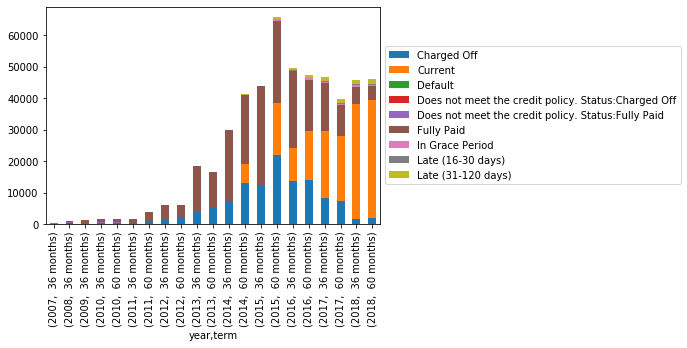

In [103]:
data.loc[data['grade'].isin(['D','E','F','G'])].groupby(['year','term','loan_status'])['term'].count().unstack('loan_status').plot(kind='bar',stacked = True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
#data.loc[data['grade'].isin(['D','E','F','G'])].loc[data['loan_status'].isin(['Charged Off','Fully Paid'])].groupby(['year','term','loan_status'])['term'].count().reset_index()

In [104]:

group = data.loc[data['grade'].isin(['D','E','F','G'])].groupby(['year','term','loan_status'])['term'].count()
group.groupby(level = 0).apply(lambda x: x/float(x.sum()))

year  term        loan_status                                        
2007   36 months  Charged Off                                            0.076923
                  Does not meet the credit policy. Status:Charged Off    0.286713
                  Does not meet the credit policy. Status:Fully Paid     0.510490
                  Fully Paid                                             0.125874
2008   36 months  Charged Off                                            0.086570
                  Does not meet the credit policy. Status:Charged Off    0.193119
                  Does not meet the credit policy. Status:Fully Paid     0.449501
                  Fully Paid                                             0.270810
2009   36 months  Charged Off                                            0.142412
                  Does not meet the credit policy. Status:Charged Off    0.059922
                  Does not meet the credit policy. Status:Fully Paid     0.177432
                  Fully Paid

In [79]:
model['emp_length'] = model['emp_length'].fillna('0')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
import itertools

a = list(model['emp_length'].str.findall('\d+'))

model['emp_length'] = list(itertools.chain.from_iterable(a))


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [141]:
model.isna().sum()

id                                  0
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                       22288
emp_length                          0
home_ownership                      0
annual_inc                          0
issue_d                             0
purpose                             0
addr_state                          0
dti                               111
delinq_2yrs                         2
earliest_cr_line                    2
fico_range_low                      0
fico_range_high                     0
inq_last_6mths                      2
mths_since_last_delinq         158598
mths_since_last_record         272389
open_acc                            2
pub_rec                             2
revol_bal                           0
revol_util                        352
total_acc   

In [81]:
model['emp_title']=model['emp_title'].fillna('Unemployed')

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [82]:
drop_dti=list(model[model['dti'].isna()].index)
model = model.drop(drop_dti)


In [83]:
drop_nas = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 
 'open_acc', 'pub_rec', 'revol_util', 'total_acc',
 'acc_now_delinq','delinq_amnt', 'collections_12_mths_ex_med']


for feature in drop_nas:
    d = list(model[model[feature].isna()].index)
    model=model.drop(d)


In [84]:
model.isna().sum()

id                                  0
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
sub_grade                           0
emp_title                           0
emp_length                          0
home_ownership                      0
annual_inc                          0
issue_d                             0
purpose                             0
addr_state                          0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
fico_range_low                      0
fico_range_high                     0
inq_last_6mths                      0
mths_since_last_delinq         158393
mths_since_last_record         271958
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                          0
total_acc   

In [183]:
model['earliest_cr_line'] = pd.to_datetime(list(model['earliest_cr_line']))


In [ ]:
#creating column for number of years of credit history

model['credit_hist_years'] = round((model['issue_d'] - model['earliest_cr_line'])/pd.Timedelta(days=365),1)



/anaconda3/lib/python3.7/site-packages/pandas/core/arrays/datetimelike.py:1268: PerformanceWarning: Adding/subtracting array of DateOffsets to DatetimeArray not vectorized
  PerformanceWarning,


In [198]:
model.head()

,id,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,issue_d,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,acc_now_delinq,delinq_amnt,mths_since_last_major_derog,collections_12_mths_ex_med,application_type,roi_percent,credit_hist_years
4,68476807,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3,MORTGAGE,104433.0,2015-12-01,major_purchase,PA,25.37,1.0,1998-06-01,695.0,699.0,3.0,12.0,NaN,12.0,0.0,21929.0,64.5,35.0,0.0,0.0,NaN,0.0,Individual,0.128894,17.5
13,66624733,18000.0,60 months,19.48,471.70,E,E2,Software Manager,7,RENT,150000.0,2015-12-01,debt_consolidation,CA,9.39,0.0,2005-06-01,665.0,669.0,1.0,NaN,75.0,18.0,1.0,14052.0,40.7,27.0,0.0,0.0,NaN,0.0,Individual,-0.474848,10.5
19,68495092,8650.0,36 months,19.89,320.99,E,E3,Program Coordinator,8,RENT,55000.0,2015-12-01,debt_consolidation,IN,25.49,0.0,2005-03-01,675.0,679.0,4.0,NaN,30.0,18.0,1.0,9568.0,46.0,19.0,0.0,0.0,NaN,0.0,Individual,0.062484,10.8
27,68526907,16000.0,60 months,17.97,406.04,D,D4,Professional Sales Associate,1,MORTGAGE,109000.0,2015-12-01,debt_consolidation,NM,23.35,0.0,2002-04-01,680.0,684.0,1.0,NaN,NaN,11.0,0.0,42469.0,87.6,33.0,0.0,0.0,NaN,0.0,Individual,0.091973,13.7
31,68341789,24250.0,60 months,24.24,701.01,F,F3,hvac technician,4,MORTGAGE,75000.0,2015-12-01,debt_consolidation,NY,20.84,0.0,2007-04-01,660.0,664.0,0.0,NaN,NaN,18.0,0.0,24799.0,65.3,21.0,0.0,0.0,NaN,0.0,Individual,-0.829921,8.7


In [204]:
months_features = ['mths_since_last_delinq','mths_since_last_record', 'mths_since_last_major_derog']

for feature in months_features:
    print(feature, 'percent NA = ', model[feature].isna().sum()/len(model))

mths_since_last_delinq percent NA =  0.4700814368982751
mths_since_last_record percent NA =  0.8071215736552821
mths_since_last_major_derog percent NA =  0.705079122001021


In [211]:
model = model.drop(months_features, axis=1)

In [213]:
model.isna().sum()

id                            0
loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
issue_d                       0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
fico_range_low                0
fico_range_high               0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
acc_now_delinq                0
delinq_amnt                   0
collections_12_mths_ex_med    0
application_type              0
roi_percent                   0
credit_hist_years             0
dtype: i

In [218]:
model = model.drop('emp_title',axis=1)

In [220]:
model.to_csv('model_df.csv')